In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("Unemploy.csv")

In [ ]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
data.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True


In [ ]:
data.shape

(768, 7)

In [ ]:
data.dropna(inplace = True)

data.shape

(740, 7)

In [ ]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
data.rename(columns={' Date': 'Date'}, inplace=True)
data.rename(columns={' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate (%)'}, inplace=True)
data.rename(columns={' Estimated Employed': 'Estimated Employed'}, inplace=True)
data.rename(columns={' Estimated Unemployment Rate (%)': 'Estimated Unemployment Rate (%)'}, inplace=True)
data.rename(columns={' Frequency': 'Frequency'}, inplace=True)

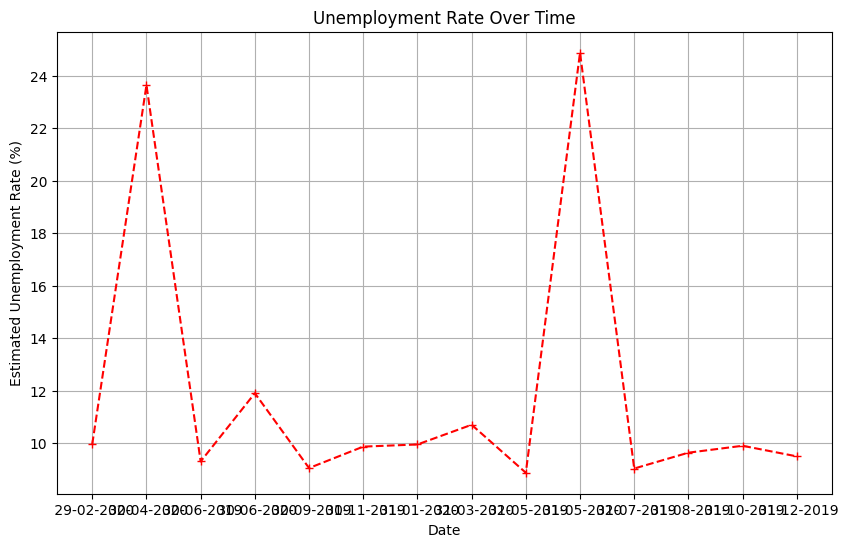

In [ ]:
mean_unemployment_over_time = data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create a line plot

plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='+', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

In [ ]:
area_mean_unemployment = data.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

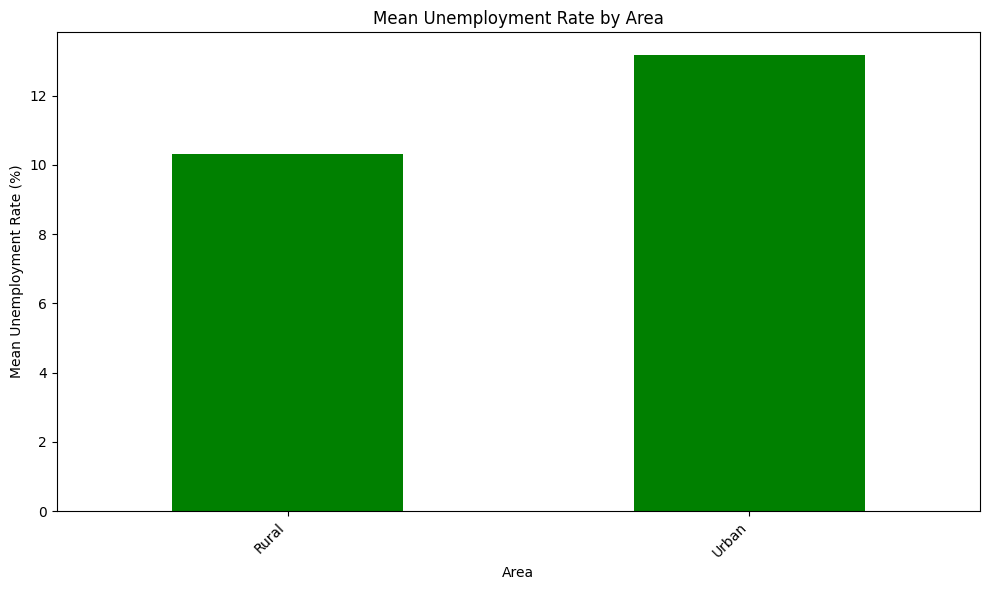

In [ ]:
area_mean_unemployment_sorted = area_mean_unemployment.sort_values()
plt.figure(figsize=(10, 6))
area_mean_unemployment_sorted.plot(kind='bar', color='green')
plt.title('Mean Unemployment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Mean Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

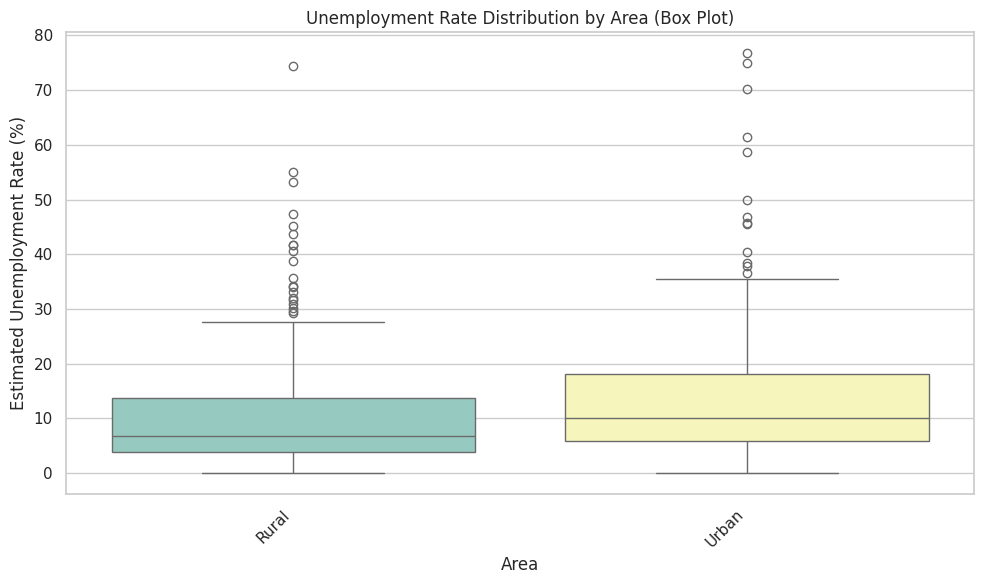

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=data, palette="Set3")
plt.title('Unemployment Rate Distribution by Area (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

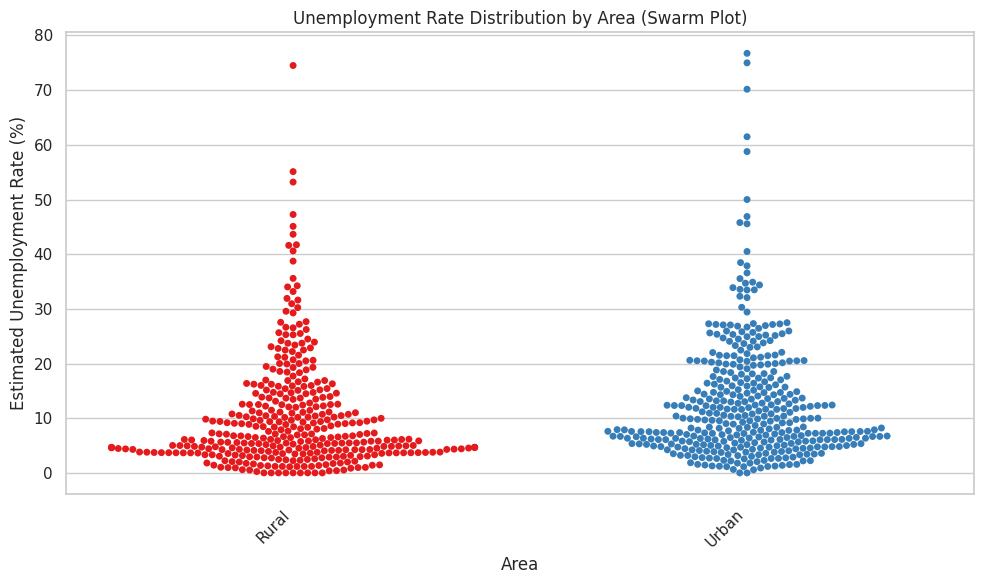

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Area', y='Estimated Unemployment Rate (%)', data=data, palette="Set1")
plt.title('Unemployment Rate Distribution by Area (Swarm Plot)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
X = data.drop(['Estimated Unemployment Rate (%)', 'Date'], axis=1)  # Assuming 'Date' is not needed for prediction
y = data['Estimated Unemployment Rate (%)']

In [ ]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
data = pd.get_dummies(data, columns=['Region', 'Area', 'Frequency'])

In [ ]:
X = data.drop(['Estimated Unemployment Rate (%)', 'Date'], axis=1)  # Assuming 'Date' is not needed for prediction
y = data['Estimated Unemployment Rate (%)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 52.25008186304052
R-squared Score: 0.6391013334407154


In [ ]:
# Calculate accuracy within a certain tolerance
tolerance = 10  # Define the tolerance level
correct_predictions = sum(abs(y_pred - y_test) <= tolerance)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions
print("Accuracy within tolerance of", tolerance, ":", accuracy)


Accuracy within tolerance of 10 : 0.8986486486486487


In [ ]:
sorted_indices = np.argsort(y_test)
sorted_actual = y_test.iloc[sorted_indices]
sorted_predicted = y_pred[sorted_indices]

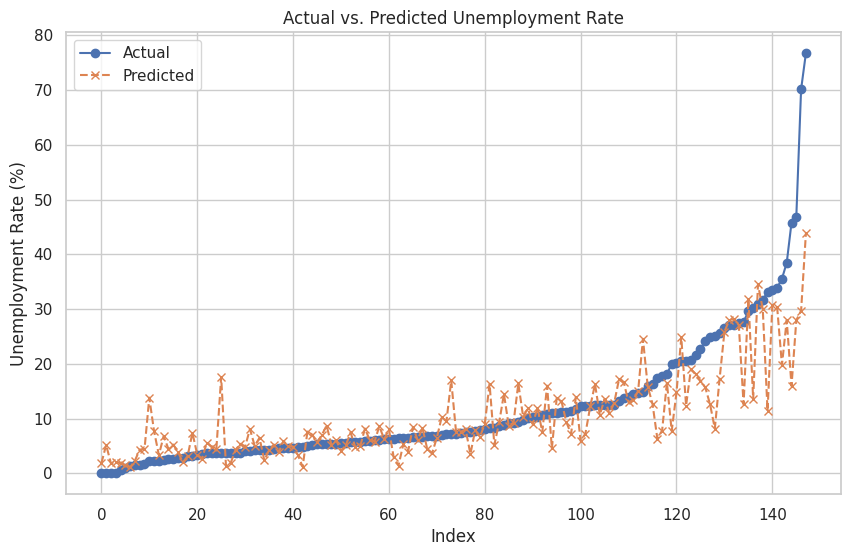

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_actual)), sorted_actual, label='Actual', marker='o')
plt.plot(range(len(sorted_predicted)), sorted_predicted, label='Predicted', linestyle='--', marker='x')
plt.xlabel("Index")
plt.ylabel("Unemployment Rate (%)")
plt.title("Actual vs. Predicted Unemployment Rate")
plt.legend()
plt.show()